In [3]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt   
import seaborn as sns             
from sklearn.cluster import KMeans   
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\Dhairya Bhatt\Downloads\Statewide Solar Projects.csv")

In [5]:
df.head(10)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
5,12/31/2023,SDG-66270,12/28/2023,Con Ed,Bronx,Bronx,10471.0,CENY-BX,Sherman_Creek,1104,Trinity Solar,NM,13.34,11.40,15657,NaN,1
6,12/31/2023,SDG-66256,12/28/2023,Con Ed,Bronx,Bronx,10465.0,CENY-BX,Parkchester_1,7672,MOMENTUM SOLAR,NM,4.41,3.77,5178,NaN,1
7,12/31/2023,SDG-66228,12/28/2023,Con Ed,Brooklyn,Kings,11230.0,CENY-BK,Bensonhurst_1,10B63,Kamtech Solar Solutions,NM,12.09,10.33,14187,NaN,1
8,12/31/2023,SDG-66227,12/28/2023,Con Ed,East Elmhurst,Queens,11369.0,CENY-Q,Corona_1,1208,Kamtech Solar Solutions,NM,4.32,3.69,5068,NaN,1
9,12/31/2023,SDG-66221,12/28/2023,Con Ed,Brooklyn,Kings,11218.0,CENY-BK,Greenwood,2B20,Kamtech Solar Solutions,NM,3.88,3.32,4560,NaN,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [7]:
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [8]:
print(df.isnull().sum())

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64


In [9]:
print(df.duplicated().sum())

0


In [10]:
df["Energy Storage System Size (kWac)"] = df["Energy Storage System Size (kWac)"].fillna(0)
print(df["Energy Storage System Size (kWac)"].isnull().sum())

0


In [11]:
print(df.isnull().sum())

Data Through Date                                  0
Project ID                                         3
Interconnection Date                               0
Utility                                            0
City/Town                                         58
County                                             0
Zip                                               96
Division                                       85234
Substation                                     79944
Circuit ID                                        30
Developer                                      10550
Metering Method                                  463
Estimated PV System Size (kWdc)                    0
PV System Size (kWac)                              0
Estimated Annual PV Energy Production (kWh)        0
Energy Storage System Size (kWac)                  0
Number of Projects                                 0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
print(df.isnull().sum())

Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Division                                       0
Substation                                     0
Circuit ID                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Energy Storage System Size (kWac)              0
Number of Projects                             0
dtype: int64


In [14]:
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,130302.000000,130302.000000,130302.000000,1.303020e+05,130302.000000,130302.0
mean,11756.039078,29.615097,22.821961,3.476317e+04,0.881863,1.0
std,1203.938971,300.536382,217.972998,3.527816e+05,52.754163,0.0
min,10001.000000,0.270000,0.230000,3.160000e+02,0.000000,1.0
25%,10914.000000,4.910000,4.200000,5.768000e+03,0.000000,1.0
50%,11413.000000,7.020000,6.000000,8.240000e+03,0.000000,1.0
75%,12534.000000,10.300000,8.800000,1.208600e+04,0.000000,1.0
max,14905.000000,6900.000000,5000.000000,8.099496e+06,5000.000000,1.0


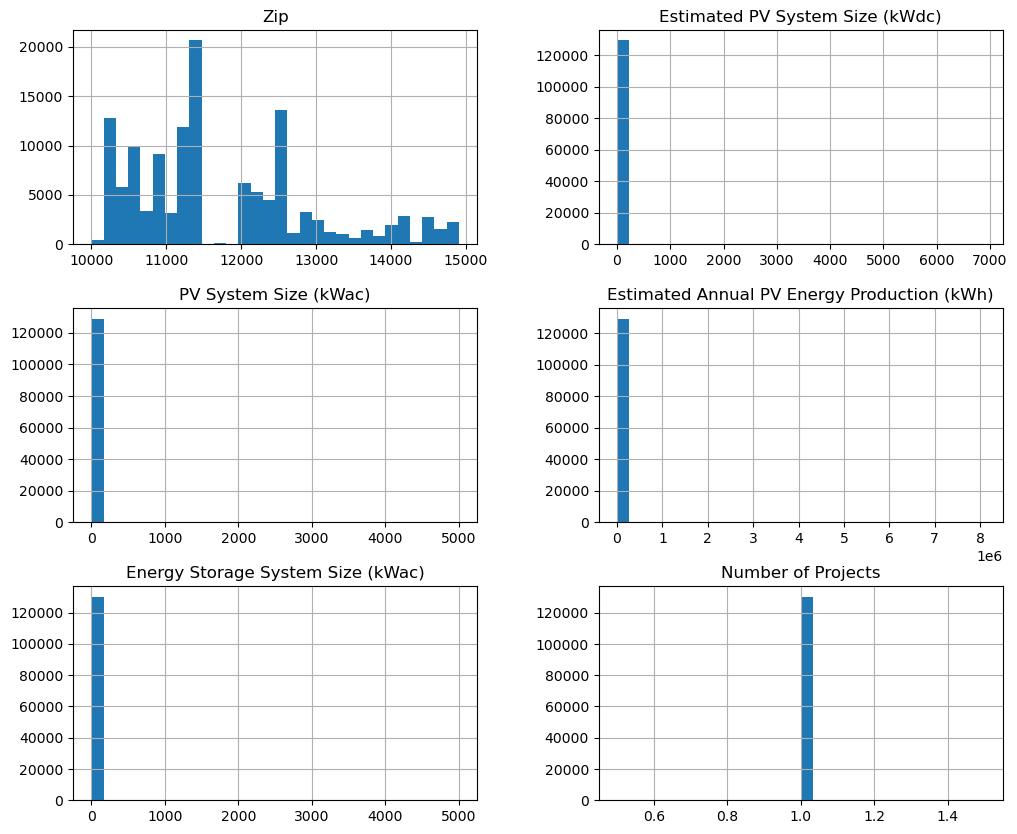

In [15]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

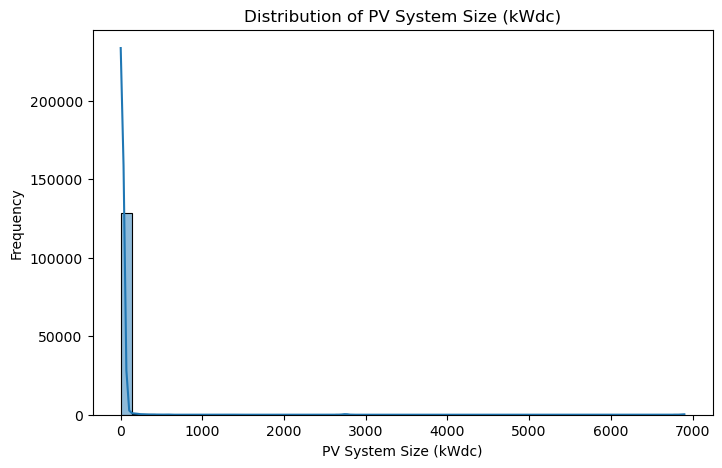

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Estimated PV System Size (kWdc)'], bins=50, kde=True)
plt.title('Distribution of PV System Size (kWdc)')
plt.xlabel('PV System Size (kWdc)')
plt.ylabel('Frequency')
plt.show()

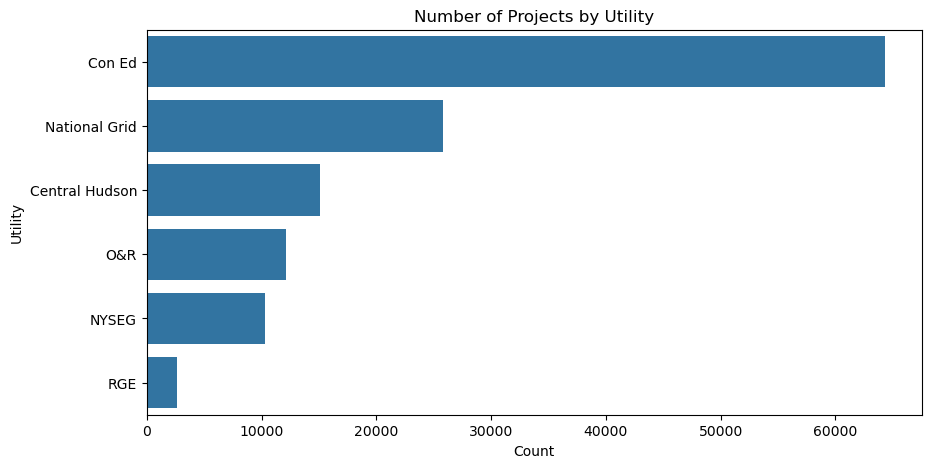

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Utility'], order=df['Utility'].value_counts().index)
plt.title('Number of Projects by Utility')
plt.xlabel('Count')
plt.ylabel('Utility')
plt.show()

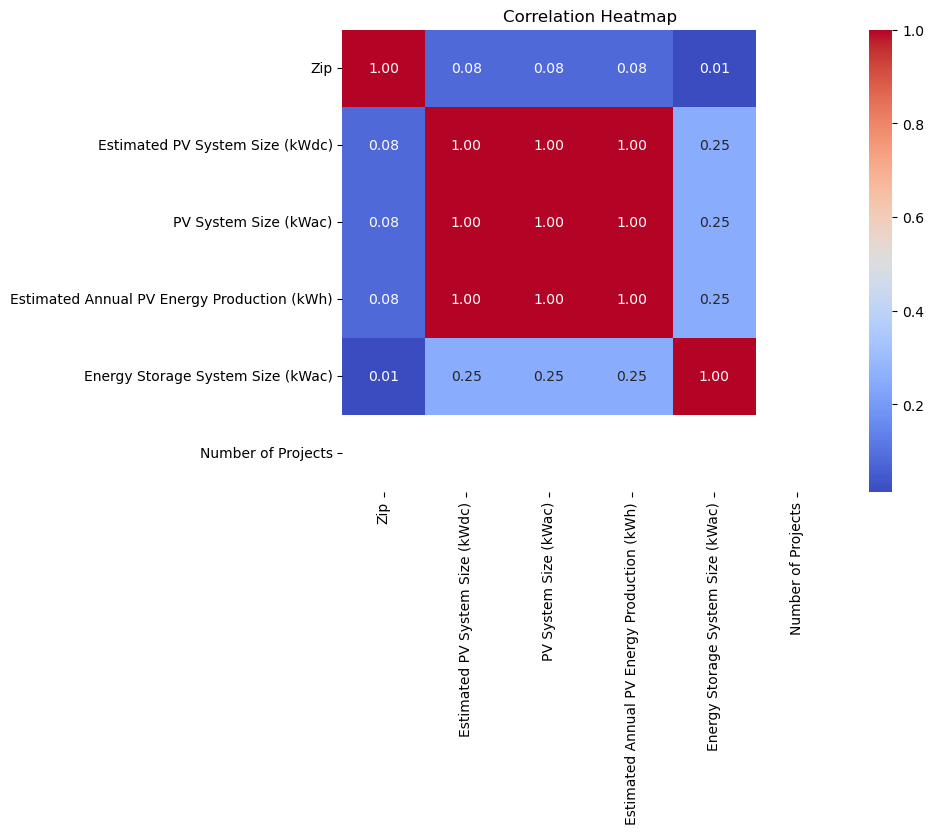

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

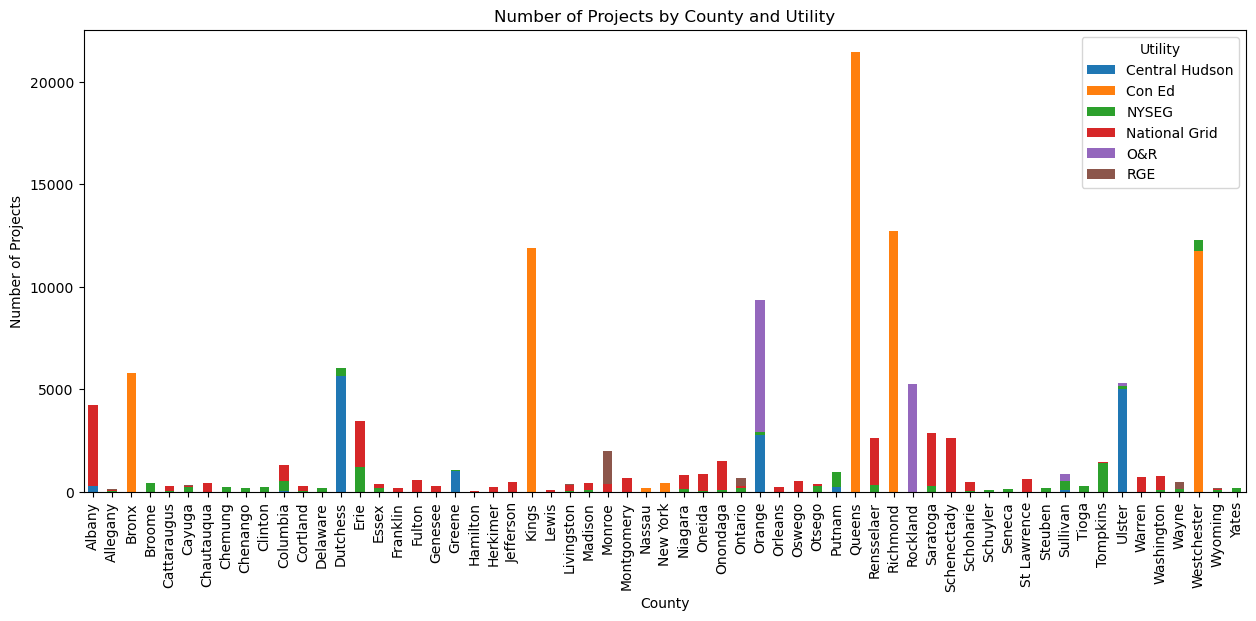

In [28]:
df_grouped = df.groupby(['County', 'Utility']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Number of Projects by County and Utility')
plt.xlabel('County')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.legend(title='Utility')
plt.show()

In [29]:
label_encoder = LabelEncoder()
df['City/Town'] = label_encoder.fit_transform(df['City/Town'])

In [30]:
df.head(10)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,1739,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,0.0,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,255,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,0.0,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,257,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,0.0,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,257,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,0.0,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,1977,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,0.0,1
5,12/31/2023,SDG-66270,12/28/2023,Con Ed,255,Bronx,10471.0,CENY-BX,Sherman_Creek,1104,Trinity Solar,NM,13.34,11.40,15657,0.0,1
6,12/31/2023,SDG-66256,12/28/2023,Con Ed,255,Bronx,10465.0,CENY-BX,Parkchester_1,7672,MOMENTUM SOLAR,NM,4.41,3.77,5178,0.0,1
7,12/31/2023,SDG-66228,12/28/2023,Con Ed,257,Kings,11230.0,CENY-BK,Bensonhurst_1,10B63,Kamtech Solar Solutions,NM,12.09,10.33,14187,0.0,1
8,12/31/2023,SDG-66227,12/28/2023,Con Ed,627,Queens,11369.0,CENY-Q,Corona_1,1208,Kamtech Solar Solutions,NM,4.32,3.69,5068,0.0,1
9,12/31/2023,SDG-66221,12/28/2023,Con Ed,257,Kings,11218.0,CENY-BK,Greenwood,2B20,Kamtech Solar Solutions,NM,3.88,3.32,4560,0.0,1


In [31]:
df.drop(columns=['Data Through Date'], inplace=True)
df.drop(columns=['Project ID'], inplace=True)
df.drop(columns=['Interconnection Date'], inplace=True)
df.drop(columns=['Utility'], inplace=True)
df.drop(columns=['County'], inplace=True)
df.drop(columns=['Division'], inplace=True)
df.drop(columns=['Substation'], inplace=True)
df.drop(columns=['Circuit ID'], inplace=True)
df.drop(columns=['Developer'], inplace=True)
df.drop(columns=['Metering Method'], inplace=True)
df.drop(columns=['Zip'], inplace=True)

In [32]:
df.head(10)

,City/Town,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,1739,6.05,5.17,7100,0.0,1
1,255,6.74,5.76,7911,0.0,1
2,257,3.05,2.61,3585,0.0,1
3,257,5.62,4.80,6592,0.0,1
4,1977,6.05,5.17,7100,0.0,1
5,255,13.34,11.40,15657,0.0,1
6,255,4.41,3.77,5178,0.0,1
7,257,12.09,10.33,14187,0.0,1
8,627,4.32,3.69,5068,0.0,1
9,257,3.88,3.32,4560,0.0,1


In [33]:
numeric_columns = [
    "Estimated PV System Size (kWdc)",
    "PV System Size (kWac)",
    "Estimated Annual PV Energy Production (kWh)",
    "Energy Storage System Size (kWac)",
    "Number of Projects"
]

def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        if df_cleaned[col].dtype in ["float64", "int64"]:  
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df, numeric_columns)

df.shape, df_cleaned.shape

((130302, 6), (116279, 6))

In [34]:
print(df_cleaned.describe())

           City/Town  Estimated PV System Size (kWdc)  PV System Size (kWac)  \
count  116279.000000                    116279.000000          116279.000000   
mean     1185.972824                         7.144968               6.106751   
std       721.329647                         3.011134               2.573735   
min         0.000000                         0.270000               0.230000   
25%       417.000000                         4.680000               4.000000   
50%      1278.000000                         7.020000               6.000000   
75%      1868.000000                         8.890000               7.600000   
max      2343.000000                        15.210000              13.000000   

       Estimated Annual PV Energy Production (kWh)  \
count                                116279.000000   
mean                                   8386.799362   
std                                    3534.753139   
min                                     316.000000   
25%      

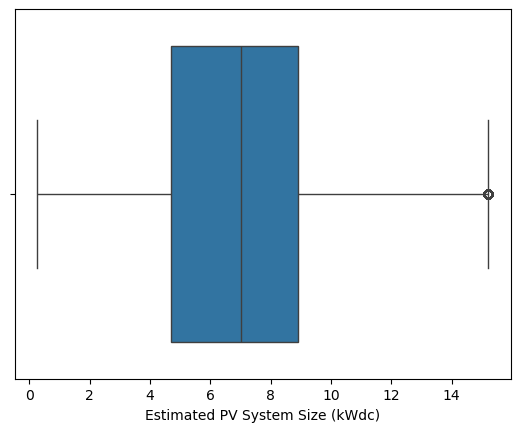

In [35]:
sns.boxplot(x=df_cleaned['Estimated PV System Size (kWdc)'])
plt.show()

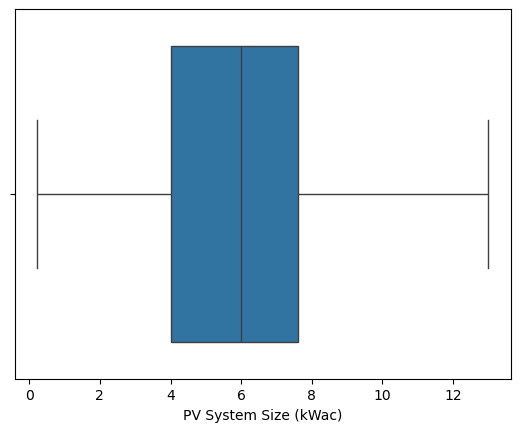

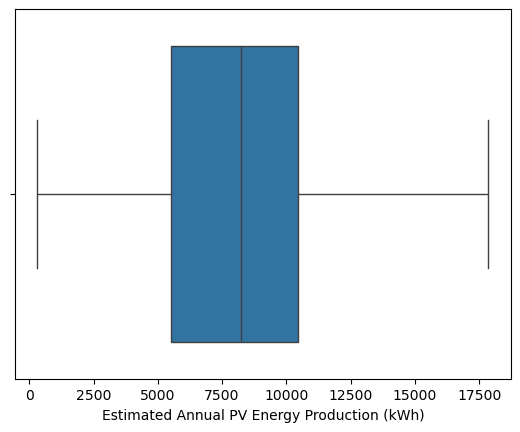

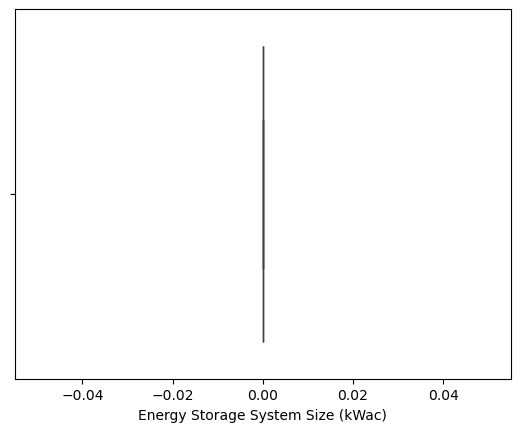

In [36]:
sns.boxplot(x=df_cleaned['PV System Size (kWac)'])
plt.show()

sns.boxplot(x=df_cleaned['Estimated Annual PV Energy Production (kWh)'])
plt.show()

sns.boxplot(x=df_cleaned['Energy Storage System Size (kWac)'])
plt.show()

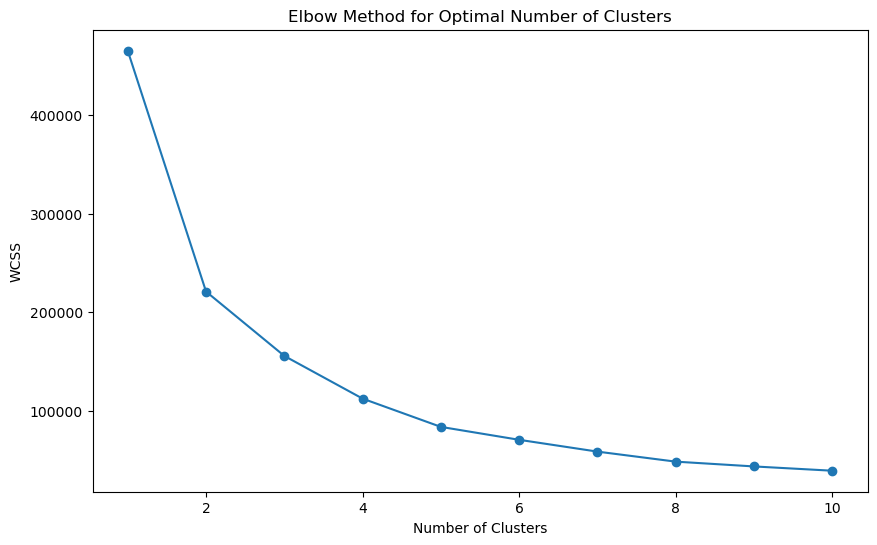

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = ["City/Town",
            "Estimated PV System Size (kWdc)",
            "PV System Size (kWac)",
            "Estimated Annual PV Energy Production (kWh)",
            "Energy Storage System Size (kWac)",
            "Number of Projects"]
X = df_cleaned[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

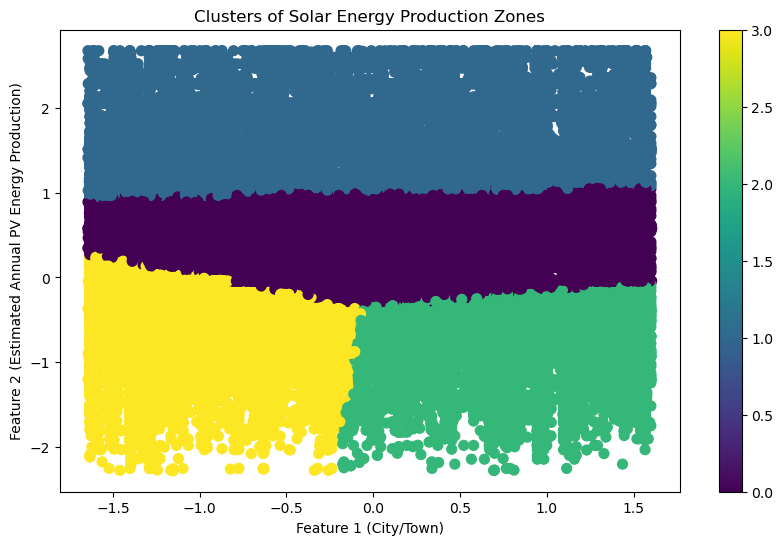

In [46]:
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled) 

df_cleaned['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters of Solar Energy Production Zones')
plt.xlabel('Feature 1 (City/Town)')
plt.ylabel('Feature 2 (Estimated Annual PV Energy Production)')
plt.colorbar()
plt.show()

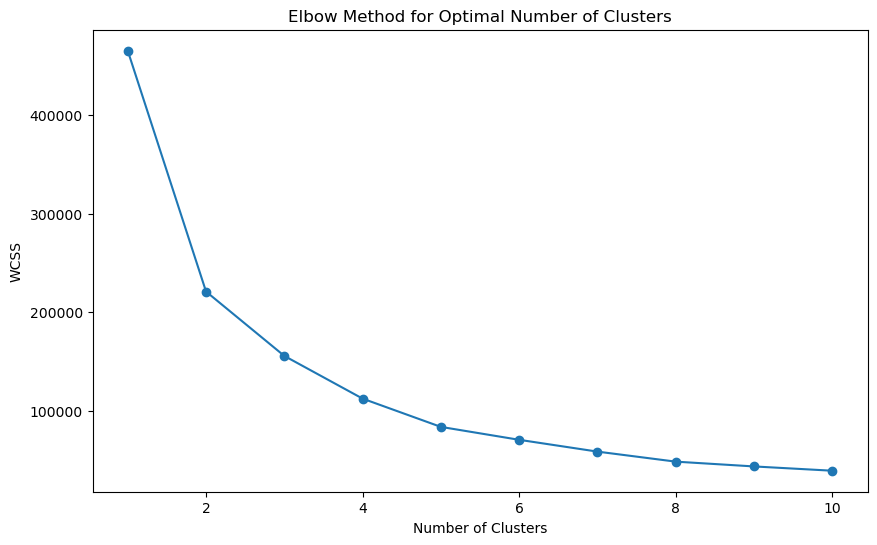

In [40]:
features = ["City/Town",
            "Estimated PV System Size (kWdc)",
            "PV System Size (kWac)",
            "Estimated Annual PV Energy Production (kWh)",
            "Energy Storage System Size (kWac)",
            "Number of Projects"]
X = df_cleaned[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

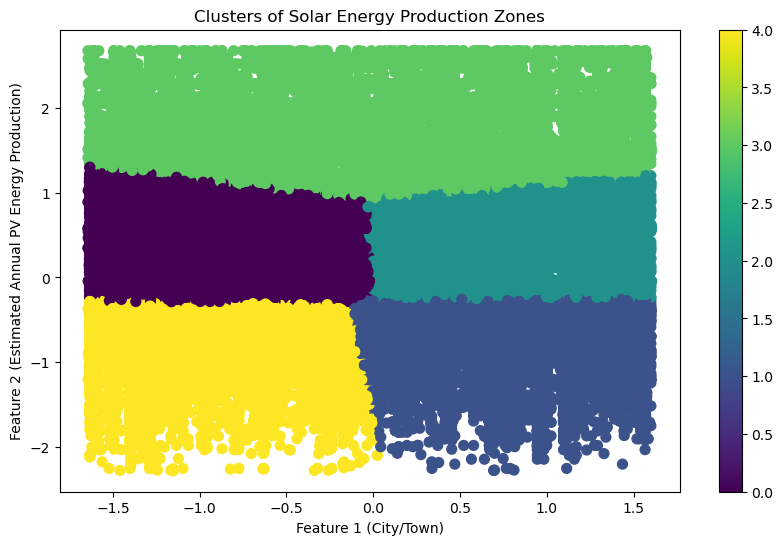

In [52]:
optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)  

df_cleaned['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters of Solar Energy Production Zones')
plt.xlabel('Feature 1 (City/Town)')
plt.ylabel('Feature 2 (Estimated Annual PV Energy Production)')
plt.colorbar()
plt.show()